In [ ]:
%cd /content/drive/MyDrive/fly_ai/3주차/dacon_기온예측/

/content/drive/MyDrive/fly_ai/3주차/dacon_기온예측


In [ ]:
!unzip /content/drive/MyDrive/fly_ai/3주차/dacon_기온예측/open.zip

Archive:  /content/drive/MyDrive/fly_ai/3주차/dacon_기온예측/open.zip
  inflating: sample_submission.csv   
  inflating: train.csv               


In [ ]:
import pandas as pd

In [ ]:
train_csv_path = '/content/drive/MyDrive/fly_ai/3주차/dacon_기온예측/train.csv'
submission_csv_path = '/content/drive/MyDrive/fly_ai/3주차/dacon_기온예측/sample_submission.csv'

train_df = pd.read_csv(train_csv_path)
submission_df = pd.read_csv(submission_csv_path)

print(train_df.head())
print(submission_df.head())

           일시  최고기온  최저기온   일교차  강수량  평균습도  평균풍속  일조합  일사합  일조율  평균기온
0  1960-01-01   2.2  -5.2   7.4  NaN  68.3   1.7  6.7  NaN  NaN  -1.6
1  1960-01-02   1.2  -5.6   6.8  0.4  87.7   1.3  0.0  NaN  NaN  -1.9
2  1960-01-03   8.7  -2.1  10.8  0.0  81.3   3.0  0.0  NaN  NaN   4.0
3  1960-01-04  10.8   1.2   9.6  0.0  79.7   4.4  2.6  NaN  NaN   7.5
4  1960-01-05   1.3  -8.2   9.5  NaN  44.0   5.1  8.2  NaN  NaN  -4.6
           일시  평균기온
0  2023-01-01     0
1  2023-01-02     0
2  2023-01-03     0
3  2023-01-04     0
4  2023-01-05     0


In [ ]:
train_df['최고기온'].fillna(method='bfill', inplace=True)  # 뒤의 값으로 대체
train_df['최저기온'].fillna(method='bfill', inplace=True)
train_df['일교차'].fillna(method='bfill', inplace=True)
train_df['강수량'].fillna(method='bfill', inplace=True)
train_df['평균풍속'].fillna(method='bfill', inplace=True)
train_df['일조합'].fillna(method='bfill', inplace=True)
train_df['일사합'].fillna(method='bfill', inplace=True)
train_df['일조율'].fillna(method='bfill', inplace=True)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_df.isnull().sum()

일시      0
최고기온    0
최저기온    0
일교차     0
강수량     0
평균습도    0
평균풍속    0
일조합     0
일사합     0
일조율     0
평균기온    0
dtype: int64

In [ ]:
# 일사합과 일조합 차이 변수 생성
train_df['일사일조차이'] = train_df['일사합'] - train_df['일조합']

In [ ]:
train_df

,일시,최고기온,최저기온,일교차,강수량,평균습도,평균풍속,일조합,일사합,일조율,평균기온,년도,월일,월,계절,강수유무,일사일조비율,일사일조합계,일사일조차이
0,1960-01-01,2.2,-5.2,7.4,0.4,68.3,1.7,6.7,4.81,28.1,-1.6,1960,01-01,1,겨울,1,0.717910,11.51,-1.89
1,1960-01-02,1.2,-5.6,6.8,0.4,87.7,1.3,0.0,4.81,28.1,-1.9,1960,01-02,1,겨울,1,inf,4.81,4.81
2,1960-01-03,8.7,-2.1,10.8,0.0,81.3,3.0,0.0,4.81,28.1,4.0,1960,01-03,1,겨울,0,inf,4.81,4.81
3,1960-01-04,10.8,1.2,9.6,0.0,79.7,4.4,2.6,4.81,28.1,7.5,1960,01-04,1,겨울,0,1.850000,7.41,2.21
4,1960-01-05,1.3,-8.2,9.5,0.0,44.0,5.1,8.2,4.81,28.1,-4.6,1960,01-05,1,겨울,0,0.586585,13.01,-3.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23006,2022-12-27,3.3,-7.3,10.6,0.1,69.8,1.8,8.8,10.25,91.7,-2.6,2022,12-27,12,겨울,1,1.164773,19.05,1.45
23007,2022-12-28,0.1,-6.0,6.1,0.1,58.1,2.5,8.7,10.86,90.6,-3.3,2022,12-28,12,겨울,1,1.248276,19.56,2.16
23008,2022-12-29,2.1,-7.8,9.9,0.0,56.3,1.7,9.0,10.88,93.8,-2.9,2022,12-29,12,겨울,0,1.208889,19.88,1.88
23009,2022-12-30,2.3,-4.4,6.7,0.0,65.6,1.9,7.9,10.84,82.3,-1.8,2022,12-30,12,겨울,0,1.372152,18.74,2.94


In [ ]:
columns_to_keep = ['일시', '최고기온', '최저기온', '일사일조차이', '평균기온']
train_df = train_df[columns_to_keep]

In [ ]:
train_df

,일시,최고기온,최저기온,일사일조차이,평균기온
0,1960-01-01,2.2,-5.2,-1.89,-1.6
1,1960-01-02,1.2,-5.6,4.81,-1.9
2,1960-01-03,8.7,-2.1,4.81,4.0
3,1960-01-04,10.8,1.2,2.21,7.5
4,1960-01-05,1.3,-8.2,-3.39,-4.6
...,...,...,...,...,...
23006,2022-12-27,3.3,-7.3,1.45,-2.6
23007,2022-12-28,0.1,-6.0,2.16,-3.3
23008,2022-12-29,2.1,-7.8,1.88,-2.9
23009,2022-12-30,2.3,-4.4,2.94,-1.8


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
# '일시' 열을 Datetime 형식으로 변환
train_df['일시'] = pd.to_datetime(train_df['일시'])

# '일시' 열을 인덱스로 설정
train_df.set_index('일시', inplace=True)

# ARIMA 모델 생성
model = ARIMA(train_df['평균기온'], order=(2, 1, 2))

# 모델 피팅
model_fit = model.fit()

# 모델 요약 정보 출력
print(model_fit.summary())

<ipython-input-75-c17502d7e3ce>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['일시'] = pd.to_datetime(train_df['일시'])
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                   평균기온   No. Observations:                23011
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -50912.442
Date:                Tue, 02 Jan 2024   AIC                         101834.884
Time:                        01:02:25   BIC                         101875.103
Sample:                    01-01-1960   HQIC                        101847.954
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5945      0.020     30.096      0.000       0.556       0.633
ar.L2         -0.1503      0.017     -8.797      0.000      -0.184      -0.117
ma.L1         -0.5714      0.020    -28.807      0.0

In [ ]:
submission_df['일시'] = pd.to_datetime(submission_df['일시'])

# 예측할 기간 설정
start_date = submission_df['일시'].min()
end_date = submission_df['일시'].max()

# ARIMA 모델을 사용하여 예측
forecast = model_fit.predict(start=start_date, end=end_date, typ='levels')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [ ]:
train_df

,최고기온,최저기온,일사일조차이,평균기온
일시,,,,
1960-01-01,2.2,-5.2,-1.89,-1.6
1960-01-02,1.2,-5.6,4.81,-1.9
1960-01-03,8.7,-2.1,4.81,4.0
1960-01-04,10.8,1.2,2.21,7.5
1960-01-05,1.3,-8.2,-3.39,-4.6
...,...,...,...,...
2022-12-27,3.3,-7.3,1.45,-2.6
2022-12-28,0.1,-6.0,2.16,-3.3
2022-12-29,2.1,-7.8,1.88,-2.9


In [ ]:
# 예측 결과 추출 및 확인
submission_df['평균기온'] = forecast.values
display(submission_df.head())

# 예측 결과 저장
submission_df.to_csv('./third_submit.csv', index=False)

,일시,평균기온
0,2023-01-01,-1.908728
1,2023-01-02,-2.626174
2,2023-01-03,-2.946184
3,2023-01-04,-3.028620
4,2023-01-05,-3.029543


# lstm

In [ ]:
import sys
import os
import warnings
warnings.filterwarnings(action='ignore')
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

In [ ]:
# 한글 폰트
if 'google.colab' in sys.modules:
    !sudo apt-get -qq -y install fonts-nanum
    font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])
    for fpath in font_files:
        fm.fontManager.addfont(fpath)

# Prophet

In [ ]:
from prophet import Prophet

In [ ]:
train_df = pd.read_csv(train_csv_path)
submission_df = pd.read_csv(submission_csv_path)

In [ ]:
display(train_df.head())
display(submission_df.head())

,일시,최고기온,최저기온,일교차,강수량,평균습도,평균풍속,일조합,일사합,일조율,평균기온
0,1960-01-01,2.2,-5.2,7.4,NaN,68.3,1.7,6.7,NaN,NaN,-1.6
1,1960-01-02,1.2,-5.6,6.8,0.4,87.7,1.3,0.0,NaN,NaN,-1.9
2,1960-01-03,8.7,-2.1,10.8,0.0,81.3,3.0,0.0,NaN,NaN,4.0
3,1960-01-04,10.8,1.2,9.6,0.0,79.7,4.4,2.6,NaN,NaN,7.5
4,1960-01-05,1.3,-8.2,9.5,NaN,44.0,5.1,8.2,NaN,NaN,-4.6


,일시,평균기온
0,2023-01-01,0
1,2023-01-02,0
2,2023-01-03,0
3,2023-01-04,0
4,2023-01-05,0


In [ ]:
train_df['최고기온'].fillna(method='bfill', inplace=True)  # 뒤의 값으로 대체
train_df['최저기온'].fillna(method='bfill', inplace=True)
train_df['일교차'].fillna(method='bfill', inplace=True)
train_df['강수량'].fillna(method='bfill', inplace=True)
train_df['평균풍속'].fillna(method='bfill', inplace=True)
train_df['일조합'].fillna(method='bfill', inplace=True)
train_df['일사합'].fillna(method='bfill', inplace=True)
train_df['일조율'].fillna(method='bfill', inplace=True)
train_df['강수량'].fillna(method='ffill', inplace=True)
train_df['일사합'].fillna(method='ffill', inplace=True)
train_df['일조율'].fillna(method='ffill', inplace=True)

In [ ]:
# '일시' 열을 datetime 형식으로 변환
train_df['일시'] = pd.to_datetime(train_df['일시'])

# '월' 정보를 추출하여 '계절' 변수 생성
train_df['월'] = train_df['일시'].dt.month
train_df['계절'] = train_df['월'].apply(lambda x: '봄' if 3 <= x <= 5 else ('여름' if 6 <= x <= 8 else ('가을' if 9 <= x <= 11 else '겨울')))

In [ ]:
# 날짜 데이터 변환
train_df['일시'] = pd.to_datetime(train_df['일시'])
train_df = train_df.set_index('일시')

# 데이터의 시간 간격 지정
train_df.index.freq = 'D'

# 일시 컬럼이 인덱스로 할당됩니다.
train_df.head()

,최고기온,최저기온,일교차,강수량,평균습도,평균풍속,일조합,일사합,일조율,평균기온,월,계절
일시,,,,,,,,,,,,
1960-01-01,2.2,-5.2,7.4,0.4,68.3,1.7,6.7,4.81,28.1,-1.6,1,겨울
1960-01-02,1.2,-5.6,6.8,0.4,87.7,1.3,0.0,4.81,28.1,-1.9,1,겨울
1960-01-03,8.7,-2.1,10.8,0.0,81.3,3.0,0.0,4.81,28.1,4.0,1,겨울
1960-01-04,10.8,1.2,9.6,0.0,79.7,4.4,2.6,4.81,28.1,7.5,1,겨울
1960-01-05,1.3,-8.2,9.5,0.0,44.0,5.1,8.2,4.81,28.1,-4.6,1,겨울


In [ ]:
# prophet에서 데이터를 인식하도록 일시는 ds로, target값인 평균기온은 y로 지정해줍니다.
train_df = train_df.reset_index()
train_df = train_df.rename(columns={'일시': 'ds', '평균기온': 'y'})

In [ ]:
train_df

,ds,최고기온,최저기온,일교차,강수량,평균습도,평균풍속,일조합,일사합,일조율,y,월,계절
0,1960-01-01,2.2,-5.2,7.4,0.4,68.3,1.7,6.7,4.81,28.1,-1.6,1,겨울
1,1960-01-02,1.2,-5.6,6.8,0.4,87.7,1.3,0.0,4.81,28.1,-1.9,1,겨울
2,1960-01-03,8.7,-2.1,10.8,0.0,81.3,3.0,0.0,4.81,28.1,4.0,1,겨울
3,1960-01-04,10.8,1.2,9.6,0.0,79.7,4.4,2.6,4.81,28.1,7.5,1,겨울
4,1960-01-05,1.3,-8.2,9.5,0.0,44.0,5.1,8.2,4.81,28.1,-4.6,1,겨울
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23006,2022-12-27,3.3,-7.3,10.6,0.1,69.8,1.8,8.8,10.25,91.7,-2.6,12,겨울
23007,2022-12-28,0.1,-6.0,6.1,0.1,58.1,2.5,8.7,10.86,90.6,-3.3,12,겨울
23008,2022-12-29,2.1,-7.8,9.9,0.0,56.3,1.7,9.0,10.88,93.8,-2.9,12,겨울
23009,2022-12-30,2.3,-4.4,6.7,0.0,65.6,1.9,7.9,10.84,82.3,-1.8,12,겨울


In [ ]:
correlation_matrix = train_df.corr()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

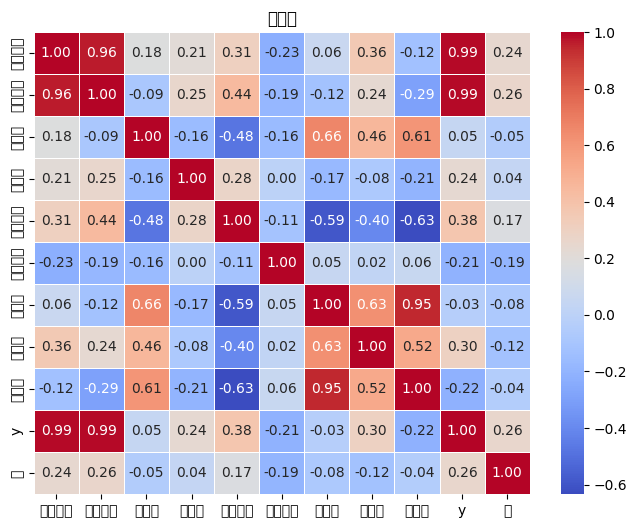

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('히트맵')
plt.show()

In [ ]:
train_df = train_df.drop(['일조율', '평균풍속'], axis=1)

In [ ]:
#모델 학습
prophet = Prophet()
prophet.fit(train_df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpozn84mlo/kkj0sbxg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpozn84mlo/xwjq6yec.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95429', 'data', 'file=/tmp/tmpozn84mlo/kkj0sbxg.json', 'init=/tmp/tmpozn84mlo/xwjq6yec.json', 'output', 'file=/tmp/tmpozn84mlo/prophet_model4q2ybnmo/prophet_model-20240102011936.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:19:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:19:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
#모델 예측
future_data = prophet.make_future_dataframe(periods = 358, freq = 'd') #periods는 예측할 기간
forecast_data = prophet.predict(future_data)
forecast_data[['ds','yhat']].tail(5)

,ds,yhat
23364,2023-12-20,0.399567
23365,2023-12-21,0.292523
23366,2023-12-22,0.160250
23367,2023-12-23,0.095147
23368,2023-12-24,-0.092838


In [ ]:
forecast_data[['ds','yhat']].tail(5)
#%%
submission_df['평균기온'] = forecast_data.yhat[-358:].values
submission_df

,일시,평균기온
0,2023-01-01,-1.062208
1,2023-01-02,-1.163818
2,2023-01-03,-1.279855
3,2023-01-04,-1.344853
4,2023-01-05,-1.383332
...,...,...
353,2023-12-20,0.399567
354,2023-12-21,0.292523
355,2023-12-22,0.160250
356,2023-12-23,0.095147


In [ ]:
#결과 저장
submission_df.to_csv("prophet_submission.csv", index=False)